In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data
data= pd.read_csv(r'C:\Users\LENOVO\Desktop\Bengaluru_House_Data.csv')

In [4]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
#Check size of the data
data.shape

(13320, 9)

In [6]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
for column in data.columns:
    print(f"Column Name:{column}")
    print(data[column].value_counts())
    print('*'*100)

Column Name:area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
****************************************************************************************************
Column Name:availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
****************************************************************************************************
Column Name:location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Kris

In [8]:
#Check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
#Statistical calculation of data
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#### Handle missing values

In [10]:
#Check null value
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
#Delete/Drop unnecessary Column
data = data.drop(['area_type','availability','society','balcony'], axis=1) #axis=1 implies column data, axis=0 implies row data

In [12]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [13]:
data['location'].isnull().sum()

1

In [14]:
#Manipulate null values
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [15]:
data['location']= data['location'].fillna('Sarjapur  Road')

In [16]:
data['location'].isnull().sum()

0

In [17]:
#To check that the value count has increase or not
data['location'].value_counts() 

Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [18]:
data['size'].isna().sum()

16

In [19]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [20]:
data['size']=data['size'].fillna('2 BHK')

In [21]:
data['size'].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [22]:
data.bath.isna().sum()

73

In [23]:
data['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [24]:
data.bath.median()

2.0

In [25]:
data['bath']=data.bath.fillna(data.bath.median())

In [26]:
data.bath.value_counts()

2.0     6981
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [27]:
data.bath.isna().sum()

0

In [28]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [29]:
#check is there any duplicat value in data
data.duplicated().sum()

882

In [30]:
#check all the duplicat value
duplicate_row=data[data.duplicated()]
duplicate_row

,location,size,total_sqft,bath,price
242,Chandapura,1 BHK,645,1.0,16.45
887,Chandapura,2 BHK,1015,2.0,25.88
895,Whitefield,2 BHK,1116,2.0,51.91
905,Kanakpura Road,1 BHK,525,1.0,26.00
971,Haralur Road,3 BHK,1464,3.0,56.00
...,...,...,...,...,...
13291,Weavers Colony,1 Bedroom,812,1.0,26.00
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.50
13311,Ramamurthy Nagar,7 Bedroom,1500,9.0,250.00
13313,Uttarahalli,3 BHK,1345,2.0,57.00


In [31]:
data.shape

(13320, 5)

In [32]:
#delete all duplicate rows
data=data.drop_duplicates()

In [33]:
data.shape

(12438, 5)

In [34]:
#Split size according to availavility of BHK
#data[['BHK','others']]=data['size'].str.split(" ",expand=True)

data['BHK']= data['size'].str.split().str.get(0).astype(float)

In [35]:
data

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3.0
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12438 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12438 non-null  float64
 4   price       12438 non-null  float64
 5   BHK         12438 non-null  float64
dtypes: float64(3), object(3)
memory usage: 680.2+ KB


In [37]:
#data['BHK'].unique() is used to check unique vale of a particular column

data['BHK'].value_counts()

2.0     5087
3.0     4515
4.0     1381
1.0      619
5.0      347
6.0      221
7.0       99
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
19.0       1
16.0       1
43.0       1
14.0       1
12.0       1
13.0       1
18.0       1
Name: BHK, dtype: int64

In [38]:
data[data.BHK>15]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27.0
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19.0
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16.0
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43.0
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18.0


In [39]:
# Handle the range data
data.total_sqft.value_counts()

1200           774
1100           203
1500           201
2400           194
600            177
              ... 
2493             1
2466 - 2856      1
3580             1
2461             1
4689             1
Name: total_sqft, Length: 2117, dtype: int64

In [40]:
def convert_range_value(x):
    splited= x.split("-")
    if len(splited)==2:
        return(float(splited[0])+float(splited[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [41]:
data['total_sqft']= data['total_sqft'].apply(convert_range_value)

In [42]:
#range data are removed
data.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

#### Calculate price per square ft.

In [43]:
data['Price_Per_sq_ft']= data.price*100000/data.total_sqft

In [44]:
data

,location,size,total_sqft,bath,price,BHK,Price_Per_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136


#### Data processing

In [45]:
#We have to reduce value count of location to perform one hot encoding
data.location.value_counts()

Whitefield                        507
Sarjapur  Road                    365
Electronic City                   273
Thanisandra                       224
Kanakpura Road                    223
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [46]:
#there is more count due to pre and post Spaces that are present in the data. To avoid this we have to perform this step

data.location = data.location.apply(lambda x: x.strip())

In [47]:
data.location.value_counts() #Value count has drecresed from 1326 to 1294

Whitefield                               508
Sarjapur  Road                           365
Electronic City                          275
Thanisandra                              226
Kanakpura Road                           223
                                        ... 
Ring Road Nagarbhavi                       1
Mango Garden Layout                        1
Vijayabank bank layout                     1
Bidere Agarahara, Behind Safal market      1
Abshot Layout                              1
Name: location, Length: 1294, dtype: int64

In [48]:
value_count_less_10= data.location.value_counts()[data.location.value_counts()<=10]

In [49]:
value_count_less_10

Sadashiva Nagar                          10
Gunjur Palya                             10
BEML Layout                              10
Ganga Nagar                              10
ITPL                                     10
                                         ..
Ring Road Nagarbhavi                      1
Mango Garden Layout                       1
Vijayabank bank layout                    1
Bidere Agarahara, Behind Safal market     1
Abshot Layout                             1
Name: location, Length: 1063, dtype: int64

In [50]:
#Listed all the row as 'Other' whose value count is less than 10

data['location']= data['location'].apply(lambda x: 'Others' if x in value_count_less_10 else x)

In [51]:
data.location.value_counts() #Value count reduced to 232

Others                  2927
Whitefield               508
Sarjapur  Road           365
Electronic City          275
Thanisandra              226
                        ... 
Banashankari Stage V      11
Doddakallasandra          11
Kodigehalli               11
NGR Layout                11
LB Shastri Nagar          11
Name: location, Length: 232, dtype: int64

In [52]:
data.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [53]:
(data.total_sqft/data.BHK).describe()

count    12392.000000
mean       577.181756
std        400.464167
min          0.250000
25%        473.625000
50%        552.500000
75%        627.500000
max      26136.000000
dtype: float64

In [54]:
data=data[((data.total_sqft/data.BHK)>=300)]
data.describe()

,total_sqft,bath,price,BHK,Price_Per_sq_ft
count,11663.000000,11663.000000,11663.000000,11663.000000,11663.000000
mean,1614.165987,2.579268,114.375806,2.666895,6396.938444
std,1298.811881,1.098496,156.556442,0.994880,4266.671906
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1120.000000,2.000000,50.000000,2.000000,4255.319149
50%,1310.000000,2.000000,70.500000,3.000000,5346.315789
75%,1724.000000,3.000000,120.000000,3.000000,6998.190161
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [55]:
data.shape

(11663, 7)

In [56]:
#Removing outliers from price_per_sq_ft
def remove_outlier(df):
    df_new= pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m= np.mean(subdf.Price_Per_sq_ft)
        sd= np.std(subdf.Price_Per_sq_ft)
        
        df1= subdf[(subdf.Price_Per_sq_ft> (m-sd)) & (subdf.Price_Per_sq_ft<= (m+sd))]
        df_new= pd.concat([df_new,df1] , ignore_index=True)
    return df_new
data= remove_outlier(data)
data.shape

(9606, 7)

In [57]:
data.describe()

,total_sqft,bath,price,BHK,Price_Per_sq_ft
count,9606.000000,9606.000000,9606.000000,9606.000000,9606.000000
mean,1526.760657,2.491880,93.577278,2.588486,5732.509016
std,907.245415,1.003423,88.815235,0.915156,2296.835776
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,50.000000,2.000000,4285.714286
50%,1300.000000,2.000000,68.280000,2.000000,5219.780220
75%,1671.500000,3.000000,103.000000,3.000000,6510.700772
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [58]:
#Removing outlier from bhk
def remove_outlier_bhk(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'):
        bhk_statistic= {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_statistic[bhk]= {
                'mean': np.mean(bhk_df.Price_Per_sq_ft),
                'std': np.std(bhk_df.Price_Per_sq_ft),
                'count': bhk_df.shape[0]
            }
        #print(location,bhk_statistic)
        
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats= bhk_statistic.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices,bhk_df[bhk_df.Price_Per_sq_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis= 'index')

In [59]:
##df_new= pd.concat([df_output,df] , ignore_index=True)
 
data = remove_outlier_bhk(data)
data.shape

(6847, 7)

In [66]:
data.describe()

,total_sqft,bath,price,BHK,Price_Per_sq_ft
count,6766.000000,6766.000000,6766.000000,6766.000000,6766.000000
mean,1493.353128,2.428614,99.643061,2.504730,6204.489642
std,846.758647,0.957872,90.535397,0.931929,2412.194353
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1093.000000,2.000000,51.252500,2.000000,4695.698575
50%,1269.860000,2.000000,75.000000,2.000000,5749.632353
75%,1685.000000,3.000000,115.000000,3.000000,6953.542497
max,30000.000000,16.000000,2200.000000,16.000000,24509.803922


In [67]:
#Removing outlier of Bathroom

data= data[data.bath< (data.BHK+2)]

In [68]:
data.shape

(6766, 7)

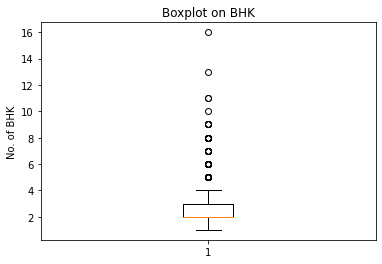

In [69]:
plt.boxplot(data['BHK'])
plt.title("Boxplot on BHK")
plt.ylabel("No. of BHK")
plt.show()

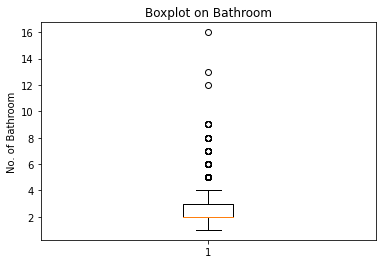

In [70]:
plt.boxplot(data['bath'])
plt.title("Boxplot on Bathroom")
plt.ylabel("No. of Bathroom")
plt.show()

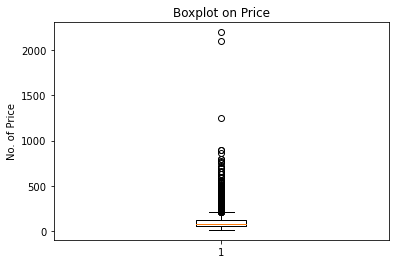

In [71]:
plt.boxplot(data['price'])
plt.title("Boxplot on Price")
plt.ylabel("No. of Price")
plt.show()

plt.figure(figsize=(16,9))

for i, var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[var])

In [72]:
data.to_csv("Processed_data_new.csv")

In [73]:
data = data.drop(data[['size','Price_Per_sq_ft']], axis=1)

In [74]:
data

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.00,4.0
1,1st Block Jayanagar,1630.0,3.0,194.00,3.0
2,1st Block Jayanagar,1875.0,2.0,235.00,3.0
3,1st Block Jayanagar,1200.0,2.0,130.00,3.0
4,1st Block Jayanagar,1235.0,2.0,148.00,2.0
...,...,...,...,...,...
9593,Yeshwanthpur,672.0,1.0,36.85,1.0
9596,Yeshwanthpur,1692.0,3.0,108.00,3.0
9598,Yeshwanthpur,2500.0,5.0,185.00,6.0
9603,Yeshwanthpur,1855.0,3.0,135.00,3.0


In [75]:
x= data.iloc[:,[0,1,2,4]]
x

,location,total_sqft,bath,BHK
0,1st Block Jayanagar,2850.0,4.0,4.0
1,1st Block Jayanagar,1630.0,3.0,3.0
2,1st Block Jayanagar,1875.0,2.0,3.0
3,1st Block Jayanagar,1200.0,2.0,3.0
4,1st Block Jayanagar,1235.0,2.0,2.0
...,...,...,...,...
9593,Yeshwanthpur,672.0,1.0,1.0
9596,Yeshwanthpur,1692.0,3.0,3.0
9598,Yeshwanthpur,2500.0,5.0,6.0
9603,Yeshwanthpur,1855.0,3.0,3.0


In [76]:
y= data.iloc[:,-2]
y

0       428.00
1       194.00
2       235.00
3       130.00
4       148.00
         ...  
9593     36.85
9596    108.00
9598    185.00
9603    135.00
9604    160.00
Name: price, Length: 6766, dtype: float64

## Import model libraries

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [78]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5412, 4)
(5412,)
(1354, 4)
(1354,)


In [80]:
column_ohe= make_column_transformer((OneHotEncoder(sparse= False),['location']), remainder= 'passthrough')

In [81]:
scaler = StandardScaler()

In [82]:
lr = LinearRegression(normalize=True)

In [105]:
pipe = make_pipeline(column_ohe,scaler,lr)


In [106]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [108]:
y_predicted_lr = pipe.predict(x_test)

In [109]:
r2_score_lr = r2_score(y_test,y_predicted_lr)
r2_score_lr

0.8148010678737061

In [87]:
ridge = Ridge()

In [88]:
pipe_ridge= make_pipeline(column_ohe,scaler,ridge)

In [89]:
pipe_ridge.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [90]:
y_predicted_ridge = pipe_ridge.predict(x_test)

In [91]:
r2_score_ridge = r2_score(y_test,y_predicted_ridge)
r2_score_ridge

0.8147016979998329

In [92]:
lasso= Lasso()

In [93]:
pipe_lasso= make_pipeline(column_ohe,scaler,lasso)

In [94]:
pipe_lasso.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [95]:
y_predicted_lasso= pipe_lasso.predict(x_test)

In [96]:
r2_score_lasso= r2_score(y_test, y_predicted_lasso)
r2_score_lasso

0.8069446249739347

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
desc_tree= DecisionTreeRegressor()

In [99]:
pipe_desc_tree = make_pipeline(column_ohe, scaler, desc_tree)

In [100]:
pipe_desc_tree.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [101]:
y_predicted_desc_tree= pipe_desc_tree.predict(x_test)

In [102]:
r2_score_desc_tree= r2_score(y_test,y_predicted_desc_tree)
r2_score_desc_tree

0.7916612306926043

#plot a bar graph using seaborn
plt.figure(figsize=(12,6))
sns.countplot('BHK',data= data)
plt.title("Total counts of house based-on number of Bedroom")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot('bath', data=data)
plt.title("Total counts of house based-on number of Bedroom")
plt.show()

In [103]:
import pickle

In [110]:
pickle.dump(pipe, open('LRModel.pkl','wb'))